# Tutorial Fast Fourier Transforms (FFTs): the importance of the phases

### Tutor: Julio C. da Silva (Néel Institute CNRS, Grenoble, France) /  email: julio-cesar.da-silva@neel.cnrs.fr
#### Personal webpage: https://sites.google.com/view/jcesardasilva

##### Disclaimer: This notebook is intended from educational reasons only and should not be use for professional data analysis. For the latter, there are other more efficient and complete codes available. 

This code run in **Python3** and requires certain python packages, which are: **Numpy, IPython, Matplotlib, Scikit-Image**

If you do not have those packages, I suggest their installation via pip install: 

    pip3 install numpy, ipython, matplotlib, scikit-image

## Playing with Fourier Transforms: the importance of the phases
In this code, we will play with the Fourier Transforms. We will find out the importance of phases in the transformation.

In [42]:
%matplotlib inline
#%matploblib notebook # uncomment this line if you want to "manipulate" the images
# standard python packages
import time

# third party packages
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure

## Preparation of the images to be Fourier transformed

In [43]:
cameraman = data.camera() # cameraman 512 x 512 pixels
astronaut = data.astronaut().mean(axis=2) # astronaut 512 x 512 pixels. Used mean to average the 3 color channels

## Rescale the images:
* phase to [-pi, pi] to avoid phase wrapping
* amplitude to [0, 1] to be consistent

In [44]:
ampcam = exposure.rescale_intensity(cameraman/256, out_range=(0, 0.1))
phasecam = exposure.rescale_intensity(cameraman/256, out_range=(-np.pi, np.pi))
ccam = ampcam*np.exp(1j*phasecam)
ampastro = exposure.rescale_intensity(astronaut/256, out_range=(0, 1))
phaseastro = exposure.rescale_intensity(astronaut/256, out_range=(-np.pi, np.pi))
castro = ampastro*np.exp(1j*phaseastro)

## Display the complex image

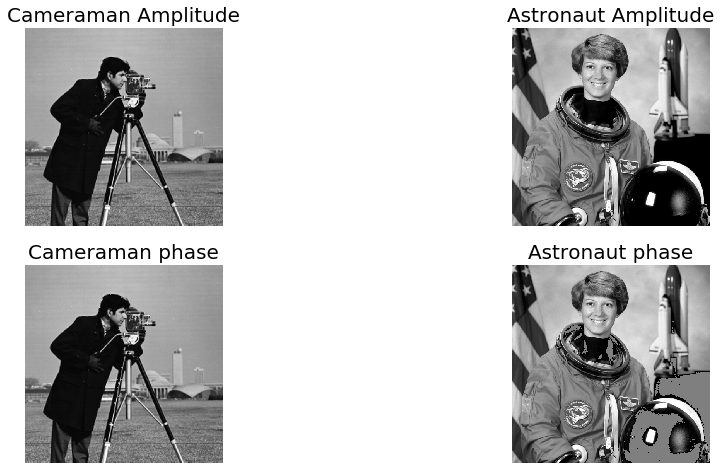

In [45]:
# display the complex images
fig1 = plt.figure(1,figsize=(16,8))
ax11 = fig1.add_subplot(221)
ax11.imshow(np.abs(ccam),cmap='gray') # amplitude
ax11.set_title('Cameraman Amplitude',fontsize = 20)
plt.axis('off')
ax12 = fig1.add_subplot(222)
ax12.imshow(np.abs(castro),cmap='gray') # phase
ax12.set_title('Astronaut Amplitude',fontsize = 20)
plt.axis('off')
ax13 = fig1.add_subplot(223)
ax13.imshow(np.angle(ccam),cmap='gray') # phase
ax13.set_title('Cameraman phase',fontsize = 20)
plt.axis('off')
ax14 = fig1.add_subplot(224)
ax14.imshow(np.angle(castro),cmap='gray') # phase
ax14.set_title('Astronaut phase',fontsize = 20)
plt.axis('off')
plt.show(block=False)

## Calculate the Fourier transform of the complex image

In [46]:
# apodization of the images to avoid edge effects in the images
window = np.outer(np.hanning(ccam.shape[0]),np.hanning(ccam.shape[1]))
# direct fourier transform
fft_ccam = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(ccam))) # cameraman
fft_ccam_apod = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(ccam*window))) # cameraman apodized
fft_castro = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(castro))) # astronaut
fft_castro_apod = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(castro*window))) # astronaut apodized

## Display amplitude and phase of the Fourier transformed images

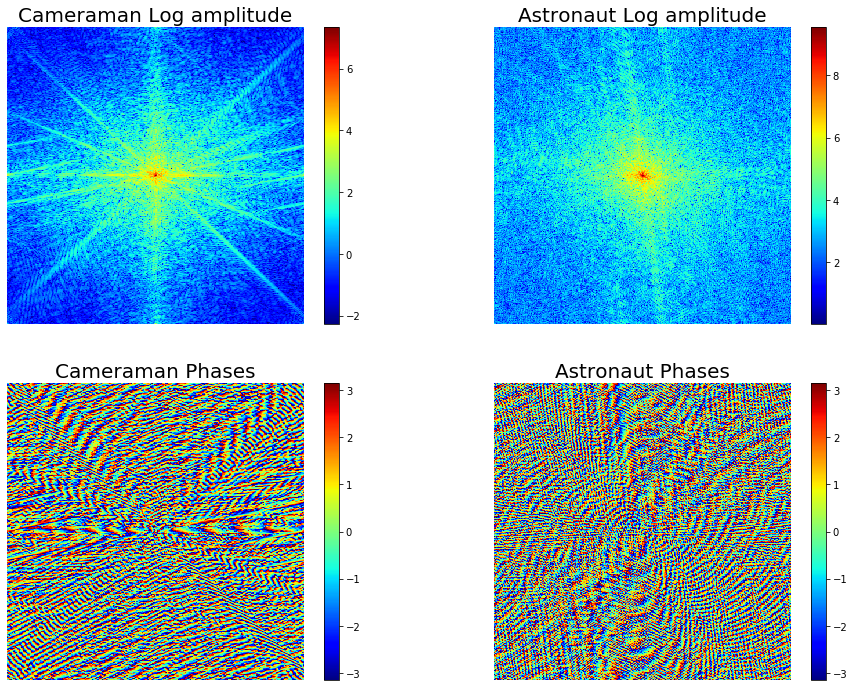

In [47]:
# display the Fourier transform
eps = 1 # shift value to prevent zeros in the log
fig2 = plt.figure(2,figsize=(16,12))
ax21 = fig2.add_subplot(221)
im21 = ax21.imshow(np.log(np.abs(fft_ccam_apod)+eps/10),cmap='jet',origin='lower')
ax21.set_title('Cameraman Log amplitude',fontsize = 20)
plt.colorbar(im21)
plt.axis('off')
ax22 = fig2.add_subplot(222)
im22 = ax22.imshow(np.log(np.abs(fft_castro_apod)+eps),cmap='jet',origin='lower')
ax22.set_title('Astronaut Log amplitude',fontsize = 20)
plt.colorbar(im22)
plt.axis('off')
ax23 = fig2.add_subplot(223)
im23 = ax23.imshow(np.angle(fft_ccam_apod),cmap='jet',origin='lower',vmin=-np.pi,vmax=np.pi)
ax23.set_title('Cameraman Phases',fontsize = 20)
plt.colorbar(im23)
plt.axis('off')
ax24 = fig2.add_subplot(224)
im24 = ax24.imshow(np.angle(fft_castro_apod),cmap='jet',origin='lower',vmin=-np.pi,vmax=np.pi)
ax24.set_title('Astronaut Phases',fontsize = 20)
plt.colorbar(im24)
plt.axis('off')
plt.show(block=False)

## Let's swap the phases of the astronaut with those of the cameraman

In [48]:
amp_fftcam = np.abs(fft_ccam)
amp_fftastro = np.abs(fft_castro)
ph_fftcam = np.angle(fft_ccam)
ph_fftastro = np.angle(fft_castro)
fft_ampcam_phastro = amp_fftcam*np.exp(1j*ph_fftastro)
fft_ampastro_phcam = amp_fftastro*np.exp(1j*ph_fftcam)

## Let's now calculate the inverse Fourier transform of those mixed datasets

In [49]:
ampcam_phastro = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fft_ampcam_phastro)))
ampastro_phcam = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fft_ampastro_phcam)))

## Displaying the results

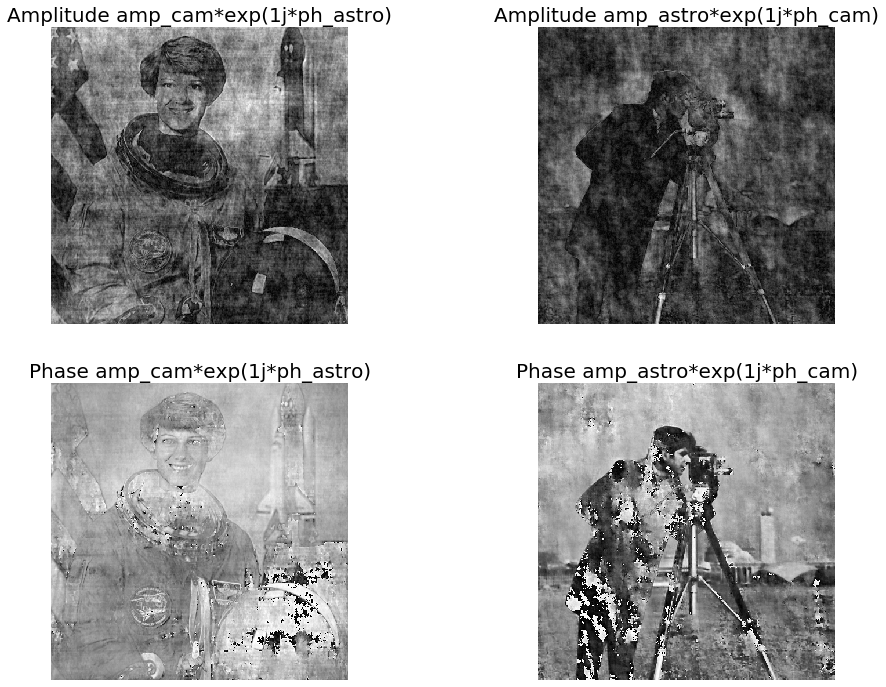

In [50]:
# display the complex images
fig3 = plt.figure(3,figsize=(16,12))
ax31 = fig3.add_subplot(221)
ax31.imshow(np.abs(ampcam_phastro),cmap='gray') # amplitude
ax31.set_title('Amplitude amp_cam*exp(1j*ph_astro)',fontsize = 20)
plt.axis('off')
ax32 = fig3.add_subplot(222)
ax32.imshow(np.abs(ampastro_phcam),cmap='gray') # phase
ax32.set_title('Amplitude amp_astro*exp(1j*ph_cam)',fontsize = 20)
plt.axis('off')
ax33 = fig3.add_subplot(223)
ax33.imshow(np.angle(ampcam_phastro),cmap='gray') # phase
ax33.set_title('Phase amp_cam*exp(1j*ph_astro)',fontsize = 20)
plt.axis('off')
ax34 = fig3.add_subplot(224)
ax34.imshow(np.angle(ampastro_phcam),cmap='gray') # phase
ax34.set_title('Phase amp_astro*exp(1j*ph_cam)',fontsize = 20)
plt.axis('off')
plt.show(block=False)